(I only used Gemini to translate the original Korean text.)

This experiment focused on the **model input (preprocessing)** methodology. A comparison was conducted between two distinct approaches:

* **Resize:** Simply **resizing** the input images to $224 \times 224$ pixels.
* **10-Crop:** As proposed in the original AlexNet paper, this method involves first resizing the input image to $256 \times 256$ pixels.
    * During **training**, a $224 \times 224$ patch is **randomly cropped** from the image (Random Crop).
    * During **testing**, $224 \times 224$ patches are cropped from five fixed locations: the top-left, top-right, bottom-left, bottom-right, and center. Including the **horizontal flip** version of each of these five patches results in a total of **10 inputs**. The final prediction is determined by **averaging the predictions** from these 10 inputs. 

To compare these methods, a total of four experiments were conducted, structured as follows:

* **exp2a:** AlexNet + CBAM architecture using the **Resize** method.
* **exp2b:** AlexNet + BN + CBAM architecture using the **Resize** method.
* **exp2c:** AlexNet + CBAM architecture using the **10-Crop** method (for comparison with exp2a).
* **exp2d:** AlexNet + BN + CBAM architecture using the **10-Crop** method (for comparison with exp2b).

The experimental results indicate that the **10-Crop** method is superior to the simple Resize method. This is likely because 10-Crop provides an **effective form of data augmentation** during training and offers **more stable labeling** by averaging 10 predictions during testing.

* exp2a achieved a peak accuracy of **0.8233** (at epoch 30), whereas exp2c achieved **0.8312** (at epoch 15).
* exp2b achieved a peak accuracy of **0.8504** (at epoch 4), whereas exp2d achieved **0.8544** (at epoch 11).

Based on this experiment, we decided to use the **AlexNet + BN + CBAM** architecture for the model's feature extractor and adopt the **10-Crop** version for data input."

In [7]:
import matplotlib.pyplot as plt
import train

In [8]:
exp2a_train, exp2a_val = train.main('configs/exp2_a.yaml')

--- Configuration ---
data:
  batch_size: 32
  num_classes: 4
  path: E:\school\2025_2\computerVision\poc_alexnet_2\data\poc_dataset
  preprocessing:
    name: resize
model:
  name: alexnet_cbam
  pretrained: true
run_name: exp2_01_resize_cbam
training:
  attention_lr: 0.0006
  device: cuda
  early_stopping_patience: 20
  epochs: 60
  learning_rate: 0.0001
  lr_scheduler:
    gamma: 0.1
    step_size: 10
  optimizer: Adam
  seed: 123
  weight_decay: 0.0001

---------------------
Using device: cuda
DataLoaders created successfully.
  - Preprocessing: resize
  - Train samples: 4155, Test samples: 1511
Model 'alexnet_cbam' created. Pretrained: True, Num classes: 4


Total Epochs:  82%|████████▏ | 49/60 [29:52<06:42, 36.57s/it, Train Acc=0.8833, Val Acc=0.8180, Best Acc=0.8233 @ ep 30]


Early stopping triggered after 20 epochs with no improvement.
Epoch 1: New best model saved to saved_models/exp2_01_resize_cbam\best_model.pth (Accuracy: 0.4236)
Epoch 2: New best model saved to saved_models/exp2_01_resize_cbam\best_model.pth (Accuracy: 0.6168)
Epoch 3: New best model saved to saved_models/exp2_01_resize_cbam\best_model.pth (Accuracy: 0.7035)
Epoch 5: New best model saved to saved_models/exp2_01_resize_cbam\best_model.pth (Accuracy: 0.7187)
Epoch 7: New best model saved to saved_models/exp2_01_resize_cbam\best_model.pth (Accuracy: 0.7313)
Epoch 8: New best model saved to saved_models/exp2_01_resize_cbam\best_model.pth (Accuracy: 0.7624)
Epoch 9: New best model saved to saved_models/exp2_01_resize_cbam\best_model.pth (Accuracy: 0.7856)
Epoch 10: New best model saved to saved_models/exp2_01_resize_cbam\best_model.pth (Accuracy: 0.8120)
Epoch 11: New best model saved to saved_models/exp2_01_resize_cbam\best_model.pth (Accuracy: 0.8147)
Epoch 13: New best model saved to s

In [9]:
exp2b_train, exp2b_val = train.main('configs/exp2_b.yaml')

--- Configuration ---
data:
  batch_size: 32
  num_classes: 4
  path: E:\school\2025_2\computerVision\poc_alexnet_2\data\poc_dataset
  preprocessing:
    name: resize
model:
  name: alexnet_bn_cbam
  pretrained: true
run_name: exp2_02_resize_bn+cbam
training:
  attention_lr: 0.0006
  device: cuda
  early_stopping_patience: 20
  epochs: 60
  learning_rate: 0.0001
  lr_scheduler:
    gamma: 0.1
    step_size: 10
  optimizer: Adam
  seed: 123
  weight_decay: 0.0001

---------------------
Using device: cuda
DataLoaders created successfully.
  - Preprocessing: resize
  - Train samples: 4155, Test samples: 1511
Model 'alexnet_bn_cbam' created. Pretrained: True, Num classes: 4


Total Epochs:  38%|███▊      | 23/60 [13:49<22:14, 36.08s/it, Train Acc=0.9367, Val Acc=0.8451, Best Acc=0.8504 @ ep 4]


Early stopping triggered after 20 epochs with no improvement.
Epoch 1: New best model saved to saved_models/exp2_02_resize_bn+cbam\best_model.pth (Accuracy: 0.6923)
Epoch 3: New best model saved to saved_models/exp2_02_resize_bn+cbam\best_model.pth (Accuracy: 0.7975)
Epoch 4: New best model saved to saved_models/exp2_02_resize_bn+cbam\best_model.pth (Accuracy: 0.8504)

--- Training Finished ---
Best validation accuracy: 0.8504


In [10]:
exp2c_train, exp2c_val = train.main('configs/exp2_c.yaml')

--- Configuration ---
data:
  batch_size: 32
  num_classes: 4
  path: E:\school\2025_2\computerVision\poc_alexnet_2\data\poc_dataset
  preprocessing:
    crop_size: 224
    name: 10crop
    resize_size: 256
model:
  name: alexnet_cbam
  pretrained: true
run_name: exp2_03_10crop_cbam
training:
  attention_lr: 0.0006
  device: cuda
  early_stopping_patience: 20
  epochs: 60
  learning_rate: 0.0001
  lr_scheduler:
    gamma: 0.1
    step_size: 10
  optimizer: Adam
  seed: 123
  weight_decay: 0.0001

---------------------
Using device: cuda
DataLoaders created successfully.
  - Preprocessing: 10crop
  - Train samples: 4155, Test samples: 1511
Model 'alexnet_cbam' created. Pretrained: True, Num classes: 4


Total Epochs:  57%|█████▋    | 34/60 [25:51<19:46, 45.64s/it, Train Acc=0.8809, Val Acc=0.8226, Best Acc=0.8312 @ ep 15]


Early stopping triggered after 20 epochs with no improvement.
Epoch 1: New best model saved to saved_models/exp2_03_10crop_cbam\best_model.pth (Accuracy: 0.5500)
Epoch 2: New best model saved to saved_models/exp2_03_10crop_cbam\best_model.pth (Accuracy: 0.6188)
Epoch 3: New best model saved to saved_models/exp2_03_10crop_cbam\best_model.pth (Accuracy: 0.6386)
Epoch 4: New best model saved to saved_models/exp2_03_10crop_cbam\best_model.pth (Accuracy: 0.6889)
Epoch 5: New best model saved to saved_models/exp2_03_10crop_cbam\best_model.pth (Accuracy: 0.7141)
Epoch 8: New best model saved to saved_models/exp2_03_10crop_cbam\best_model.pth (Accuracy: 0.7624)
Epoch 9: New best model saved to saved_models/exp2_03_10crop_cbam\best_model.pth (Accuracy: 0.7935)
Epoch 10: New best model saved to saved_models/exp2_03_10crop_cbam\best_model.pth (Accuracy: 0.8134)
Epoch 13: New best model saved to saved_models/exp2_03_10crop_cbam\best_model.pth (Accuracy: 0.8147)
Epoch 15: New best model saved to s

In [19]:
exp2d_train, exp2d_val = train.main('configs/exp2_d.yaml')

--- Configuration ---
data:
  batch_size: 32
  num_classes: 4
  path: E:\school\2025_2\computerVision\poc_alexnet_2\data\poc_dataset
  preprocessing:
    crop_size: 224
    name: 10crop
    resize_size: 256
model:
  name: alexnet_bn_cbam
  pretrained: true
run_name: exp2_04_10crop_bn+cbam
training:
  attention_lr: 0.0006
  device: cuda
  early_stopping_patience: 20
  epochs: 60
  learning_rate: 0.0001
  lr_scheduler:
    gamma: 0.1
    step_size: 10
  optimizer: Adam
  seed: 123
  weight_decay: 0.0001

---------------------
Using device: cuda
DataLoaders created successfully.
  - Preprocessing: 10crop
  - Train samples: 4155, Test samples: 1511
Model 'alexnet_bn_cbam' created. Pretrained: True, Num classes: 4


Total Epochs:  50%|█████     | 30/60 [21:36<21:36, 43.23s/it, Train Acc=0.9300, Val Acc=0.8332, Best Acc=0.8544 @ ep 11]


Early stopping triggered after 20 epochs with no improvement.
Epoch 1: New best model saved to saved_models/exp2_04_10crop_bn+cbam\best_model.pth (Accuracy: 0.6982)
Epoch 2: New best model saved to saved_models/exp2_04_10crop_bn+cbam\best_model.pth (Accuracy: 0.7909)
Epoch 7: New best model saved to saved_models/exp2_04_10crop_bn+cbam\best_model.pth (Accuracy: 0.8226)
Epoch 10: New best model saved to saved_models/exp2_04_10crop_bn+cbam\best_model.pth (Accuracy: 0.8240)
Epoch 11: New best model saved to saved_models/exp2_04_10crop_bn+cbam\best_model.pth (Accuracy: 0.8544)

--- Training Finished ---
Best validation accuracy: 0.8544


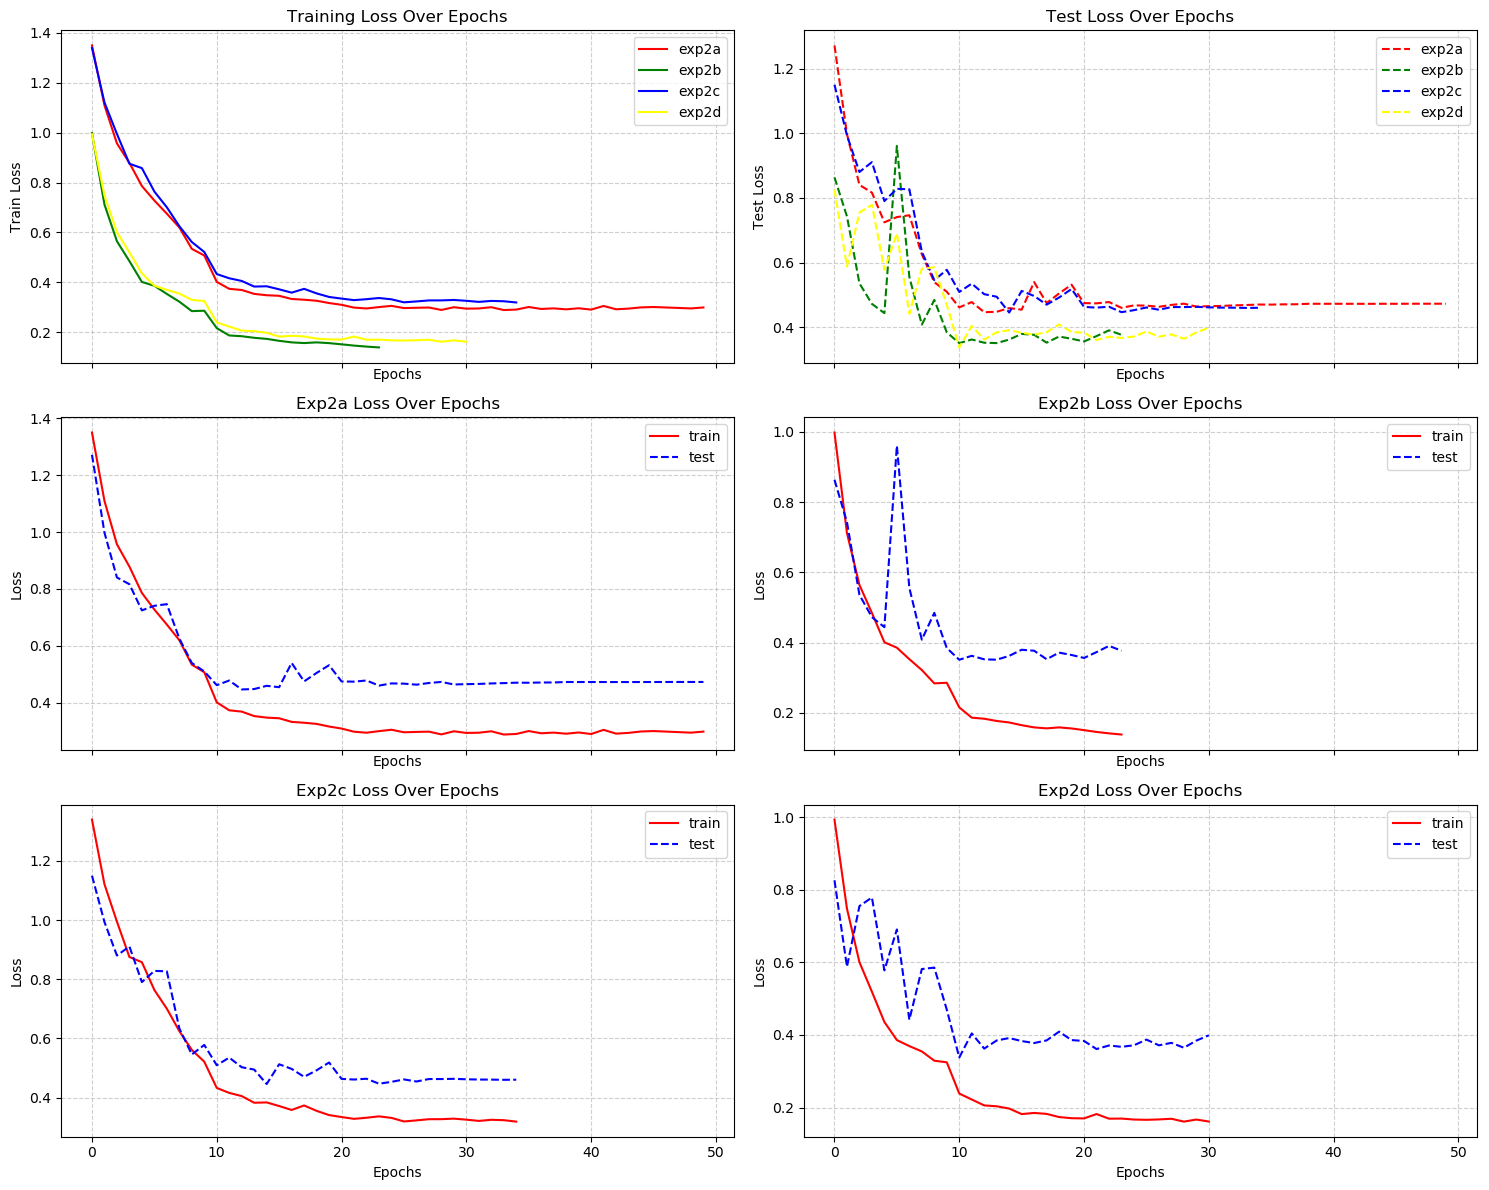

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12), sharex=True)


# ==============
# Train Loss Graph
ax1 = axes[0][0]
ax1.plot(exp2a_train, label='exp2a', color='red')
ax1.plot(exp2b_train, label='exp2b', color='green')
ax1.plot(exp2c_train, label='exp2c', color='blue')
ax1.plot(exp2d_train, label='exp2d', color='yellow')

ax1.set_title('Training Loss Over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Train Loss')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# ==============
# Test Loss Graph
ax2 = axes[0][1]
ax2.plot(exp2a_val, label='exp2a', linestyle='--', color='red')
ax2.plot(exp2b_val, label='exp2b', linestyle='--', color='green')
ax2.plot(exp2c_val, label='exp2c', linestyle='--', color='blue')
ax2.plot(exp2d_val, label='exp2d', linestyle='--', color='yellow')

ax2.set_title('Test Loss Over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Loss')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

# ==============
# exp2a
ax = axes[1][0]
ax.plot(exp2a_train, label='train', color='red')
ax.plot(exp2a_val, label='test', linestyle='--', color='blue')

ax.set_title('Exp2a Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# ==============
# exp2b
ax = axes[1][1]
ax.plot(exp2b_train, label='train', color='red')
ax.plot(exp2b_val, label='test', linestyle='--', color='blue')

ax.set_title('Exp2b Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# ==============
# exp2c
ax = axes[2][0]
ax.plot(exp2c_train, label='train', color='red')
ax.plot(exp2c_val, label='test', linestyle='--', color='blue')

ax.set_title('Exp2c Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# ==============
# exp2d
ax = axes[2][1]
ax.plot(exp2d_train, label='train', color='red')
ax.plot(exp2d_val, label='test', linestyle='--', color='blue')

ax.set_title('Exp2d Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()